In [1]:
# Mount
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!ls -a drive/MyDrive

In [ ]:
%cd "/content/drive/MyDrive/CS7643-project/scripts"
%load_ext autoreload
%autoreload 2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Install required packages
%cd "/content/drive/MyDrive/CS7643-project/scripts"
!pip install -r requirements.txt

In [ ]:
# Don't run this
# untar some data files
%cd "/content/drive/MyDrive/CS7643-project/data/recipe1M"
!tar -xvzf "recipe1M_layers.tar.gz"

In [ ]:
# Don't run this
%cd "/content/drive/MyDrive/CS7643-project/data/text"
!gzip -d "vocab.bin.gz"

In [ ]:
# Don't run this
# create the vocab.txt file
%cd "/content/drive/MyDrive/CS7643-project/scripts"
!python get_vocab.py "../data/text/vocab.bin"

/content/drive/MyDrive/CS7643-project/scripts


In [ ]:
# Don't run this
# create bigrams
!python bigrams.py --crtbgrs

In [ ]:
# Don't run this
# create classes1M file
!python bigrams.py --nocrtbgrs

In [ ]:
# Don't run this
!python mk_dataset.py

In [ ]:
# Don't run this
!python mk_dataset.py -lmdb_partition val

In [ ]:
# Don't run this
!python mk_dataset.py -lmdb_partition test

In [ ]:
# Don't run this
%cd "/content/drive/MyDrive/CS7643-project/data/images"
!tar -xf recipe1M_images_train.tar

/content/drive/MyDrive/CS7643-project/data/images


In [ ]:
from data_loader import ImagerLoader
import torch.utils.data
import torchvision.transforms as transforms

In [ ]:
train_loader = torch.utils.data.DataLoader(
    ImagerLoader('../data/images/',
                 transforms.Compose([
                     transforms.Scale(256),
                     transforms.CenterCrop(256),
                     transforms.RandomCrop(224),
                     transforms.RandomHorizontalFlip(),
                     transforms.ToTensor(),               
                 ]), data_path='../data/', partition='train', sem_reg=False),
                 batch_size=2, shuffle=False, num_workers=1, pin_memory=True
)

In [ ]:
it = iter(train_loader)
input, target = next(it)

torch.Size([3, 224, 224])


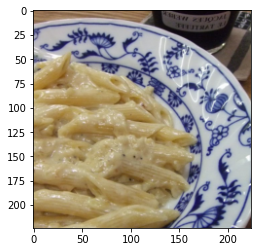

In [ ]:
import matplotlib.pyplot as plt
print(input[0][0].shape)
plt.imshow(input[0][0].permute(1, 2, 0))

In [ ]:
from recipe_model import JointEmbeddingModel
model = JointEmbeddingModel()
output = model(*input)
print([output[i].shape for i in range(len(output))])

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

[torch.Size([2, 1024]), torch.Size([2, 1024]), torch.Size([2, 1048]), torch.Size([2, 1048])]


In [ ]:
!python train.py -batch_size 16 -n_workers 4 -epoch 10 -valfreq 5 -medr 200 -early_stop 500